# Clasificación usando keras

**Profesor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />

**Profesor:** Sebastián Arpón <br />
**E-mail:** <rmunoz@metricarts.com> <br />

In [2]:
import os
import time
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers

from sklearn.metrics import accuracy_score

from IPython.display import clear_output
%matplotlib inline

### Settings

In [3]:
# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.1

### Create artificial dataset

In [4]:
X, y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

### Auxiliary plotting function

In [7]:
# the function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    clear_output()
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(8,6))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()
    else:
        plt.show()
        time.sleep(1)
        plt.close()

### Visualization of the data set

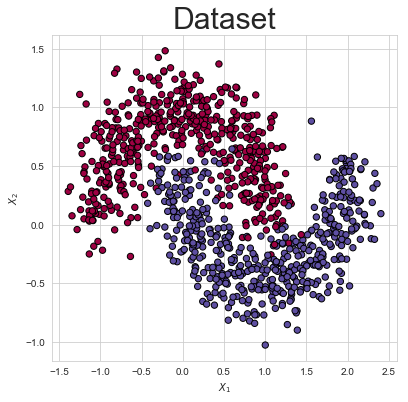

In [8]:
make_plot(X, y, "Dataset")

### Keras model

In [11]:
# Building a model
model = Sequential()
model.add(Dense(25, input_dim=2,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=200, verbose=0)

In [12]:
Y_test_hat = model.predict_classes(X_test)
acc_test = accuracy_score(y_test, Y_test_hat)
print("Test set accuracy: {:.2f} ".format(acc_test))

Test set accuracy: 0.99 


In [13]:
print(y_test)

[1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1]


In [16]:
#print(Y_test_hat)

## Visualisation of the learning process

### Settings

In [17]:
# boundary of the graph
GRID_X_START = -1.5
GRID_X_END = 2.5
GRID_Y_START = -1.0
GRID_Y_END = 2
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "./results/"

### Definition of grid boundaries

In [18]:
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid

### Keras Model

Levantaremos un servidor de TensorBoard para visualizar los resultados

`tensorboard --logdir=logs/`

In [19]:
def callback_keras_plot(epoch, logs):
    plot_title = "Keras Model - It: {:05}".format(epoch)
    file_name = None#"keras_model_{:05}.png".format(epoch)
    file_path = None#os.path.join(OUTPUT_DIR, file_name)
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    make_plot(X_test, y_test, plot_title, file_name=file_path, XX=XX, YY=YY, preds=prediction_probs)

In [20]:
# Adding callback functions that they will run in every epoch
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='logs/{}'.format(time.time()))
testmodel_cbk = keras.callbacks.LambdaCallback(on_epoch_end=callback_keras_plot)

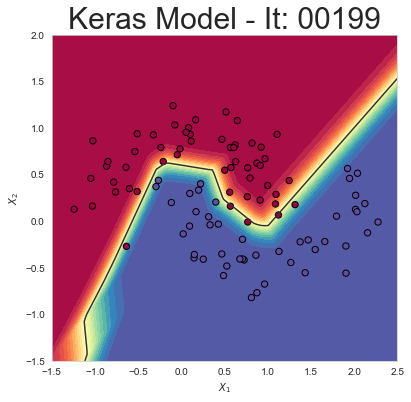

In [22]:
# Building a model
model = Sequential()
model.add(Dense(5, input_dim=2,activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Create a TensorBoard instance with the path to the logs directory
tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='logs/{}'.format(time.time()))

# Training
history = model.fit(X_train, y_train, epochs=200, verbose=0, callbacks=[testmodel_cbk, tensorboard_cbk])

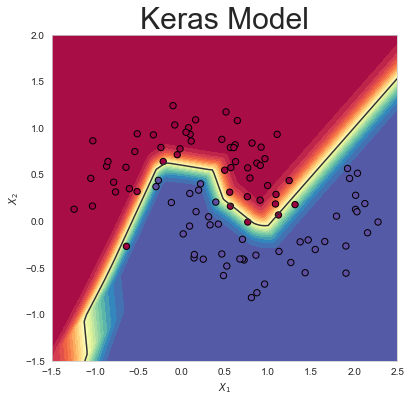

In [23]:
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
make_plot(X_test, y_test, "Keras Model", file_name=None, XX=XX, YY=YY, preds=prediction_probs)

In [25]:
model.weights[0]

<tf.Variable 'dense_21/kernel:0' shape=(2, 5) dtype=float32_ref>